# Probably Interesting Data
## Audio features of songs ranging from 1922 to 2011

### Build a heuristic to model the data using mixture models of probability distributions programmatically
https://www.kaggle.com/uciml/msd-audio-features



In [1]:
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import math
from statistics import mean, stdev

## Read in the data

In [2]:
df = pd.read_csv("../data/external/audio-features-of-songs-ranging-from-1922-to-2011.zip", compression="zip")

In [3]:
df.head(1)

label  TimbreAvg1  TimbreAvg2  TimbreAvg3  TimbreAvg4  TimbreAvg5  \
0   2001    49.94357    21.47114     73.0775     8.74861   -17.40628   

   TimbreAvg6  TimbreAvg7  TimbreAvg8  TimbreAvg9         ...          \
0   -13.09905   -25.01202   -12.23257     7.83089         ...           

   TimbreCovariance69  TimbreCovariance70  TimbreCovariance71  \
0             13.0162           -54.40548            58.99367   

   TimbreCovariance72  TimbreCovariance73  TimbreCovariance74  \
0            15.37344             1.11144           -23.08793   

   TimbreCovariance75  TimbreCovariance76  TimbreCovariance77  \
0            68.40795            -1.82223           -27.46348   

   TimbreCovariance78  
0             2.26327  

[1 rows x 91 columns]

## Feature Engineering

In [4]:
df[df.columns[0]].unique()

array([2001, 2007, 2008, 2002, 2004, 2003, 1999, 1992, 1997, 1987, 2000,
       2005, 1996, 1998, 2009, 2006, 1993, 1991, 1933, 1930, 1935, 1995,
       1941, 1990, 1943, 1994, 1974, 1976, 1975, 1970, 1971, 1981, 1989,
       1969, 1972, 1973, 1983, 2010, 1985, 1988, 1979, 1980, 1986, 1958,
       1978, 1968, 1962, 1967, 1982, 1984, 1961, 1966, 1964, 1960, 1965,
       1963, 1977, 1942, 1945, 1955, 1926, 1927, 1957, 1959, 1956, 1954,
       1928, 1948, 1922, 1952, 1953, 1944, 1946, 1949, 1950, 1939, 1932,
       1938, 1937, 1936, 1940, 1951, 1929, 1934, 1947, 1931, 1925, 1924,
       2011])

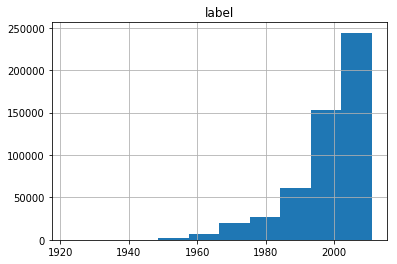

In [5]:
hist = df.hist(column = df.columns[0])

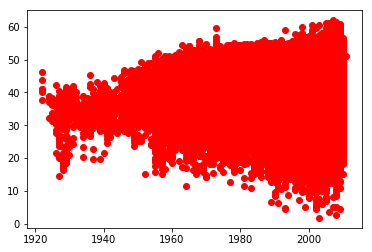

In [6]:
plt.plot(df['label'], df['TimbreAvg1'], 'ro')
plt.show()

Based on observation from distribution of songs over years, we plan to trim dataset to focus on solely songs produced in the year 2000 or later.  This still provides us a large amount of data to work with.

In [7]:
df2 = df[['label', 'TimbreAvg1']].copy()

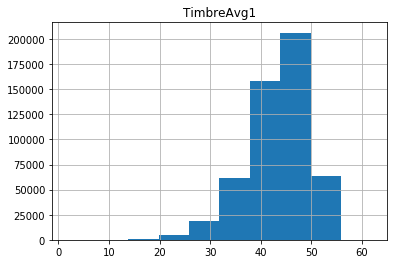

In [8]:
hist2 = df2.hist(column = df2.columns[1])

## Mixture Models of PDF

In [9]:
def gauss_transform(col):
    print(col)
    result_arr = []
    
    mu = mean(col)
    sig = stdev(col)
    frac_part = 1/(sig*math.sqrt(2*math.pi))
    for val in col:
        exponent_part = ((val - mu)**2) / (2*(mu**2)) * -1
        result_arr.append(frac_part * math.exp(exponent_part))
        
    return result_arr
        

In [10]:
gaus_vals = gauss_transform(df['TimbreAvg1'].values.tolist())
years = df['label'].values.tolist()
gaus_plot1 = pd.DataFrame({'Year': years,'TA1': gaus_vals})
gaus_plot1.head()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Year       TA1
0  2001  0.065004
1  2001  0.065253
2  2001  0.064757
3  2001  0.065339
4  2001  0.064753

In [11]:
gaus_vals = gauss_transform(df['TimbreAvg2'].values.tolist())
years = df['label'].values.tolist()
gaus_plot2 = pd.DataFrame({'Year': years,'TA2': gaus_vals})
gaus_plot2.head()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Year            TA2
0  2001   5.056507e-56
1  2001   3.372563e-41
2  2001  7.705719e-125
3  2001   3.642203e-04
4  2001  1.719663e-221

In [12]:
gaus_vals = gauss_transform(df['TimbreAvg3'].values.tolist())
years = df['label'].values.tolist()
gaus_plot3 = pd.DataFrame({'Year': years,'TA3': gaus_vals})
gaus_plot3.head()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Year           TA3
0  2001  1.079564e-14
1  2001  1.091108e-13
2  2001  4.086122e-09
3  2001  6.929940e-05
4  2001  1.447485e-12

In [13]:
gaus_vals = gauss_transform(df['TimbreAvg4'].values.tolist())
years = df['label'].values.tolist()
gaus_plot4 = pd.DataFrame({'Year': years,'TA4': gaus_vals})
gaus_plot4.head()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Year           TA4
0  2001  1.481598e-11
1  2001  1.393857e-24
2  2001  2.147540e-26
3  2001  1.157078e-02
4  2001  6.924233e-11

In [14]:
gaus_vals = gauss_transform(df['TimbreAvg5'].values.tolist())
years = df['label'].values.tolist()
gaus_plot5 = pd.DataFrame({'Year': years,'TA5': gaus_vals})
gaus_plot5.head()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Year       TA5
0  2001  0.004429
1  2001  0.014789
2  2001  0.017451
3  2001  0.009026
4  2001  0.006377

In [15]:
gaus_vals = gauss_transform(df['TimbreAvg6'].values.tolist())
years = df['label'].values.tolist()
gaus_plot6 = pd.DataFrame({'Year': years,'TA6': gaus_vals})
gaus_plot6.head()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Year       TA6
0  2001  0.028913
1  2001  0.008510
2  2001  0.019796
3  2001  0.006671
4  2001  0.023142

In [16]:
%%latex

\mathcal{N}(x|\mu,\sigma^2) = \frac{1}{{\sigma \sqrt {2\pi } }}e^{{{ - \left( {x - \mu } \right)^2 } \mathord{\left/ {\vphantom {{ - \left( {x - \mu } \right)^2 } {2\sigma ^2 }}} \right. \kern-\nulldelimiterspace} {2\sigma ^2 }}}




<IPython.core.display.Latex object>

   Year       TA1
0  2001  0.065004
1  2001  0.065253
2  2001  0.064757
3  2001  0.065339
4  2001  0.064753


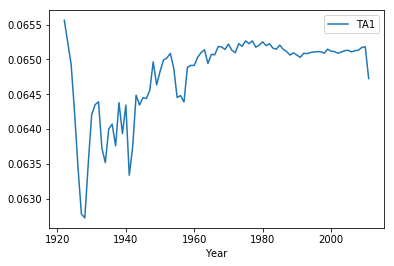

In [17]:
#plt.plot(gaus_plot1)
#gaus_plot1.apply(lambda x: (x.groupby('TA1').sum().sort_values('Year'))).plot.bar()

#gaus_plot1['Year'] = pd.to_datetime(gaus_plot1.Year)
gaus_graph = gaus_plot1.groupby('Year').mean()

decade_list = [[]]

#print(gaus_graph)
gaus_graph.plot()

#gaus_plot1.plot(x='Year', y='TA1')
#plt.plot( 'year', 'y2', data=df, marker='', color='olive', linewidth=2)
#plt.plot( 'year', 'y3', data=df, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")


In [36]:
print(gaus_graph.head())
bob = gaus_graph.items
for key,value in bob:
    print(key,value)


           TA1
Year          
1922  0.065563
1924  0.064930
1925  0.064242
1926  0.063453
1927  0.062781


TypeError: 'method' object is not iterable

In [26]:
#gg1 = gaus_graph.sort_values(by='Year', ascending=True)
data = gaus_graph['TA1'].values.tolist()
years = gaus_graph.Years.values.tolist()

AttributeError: 'DataFrame' object has no attribute 'Years'

In [19]:
year_list = [x for x in range(1920, 2010, 10)]

In [20]:
results = [0 for _ in range(100000)]
counter = 0
yr_index = 0
for i in range(len(data)):
    print(years[i], '% 10', years[i]%10)
    if years[i] % 10 or counter == 0:
        counter += 1
        results[yr_index] += data[i]
    else:
        results[yr_index] /= counter
        i -= 1
        counter = 0
        yr_index += 1


1922 % 10 2
1922 % 10 2
1922 % 10 2
1922 % 10 2
1922 % 10 2
1922 % 10 2
1924 % 10 4
1924 % 10 4
1924 % 10 4
1924 % 10 4
1924 % 10 4
1925 % 10 5
1925 % 10 5
1925 % 10 5
1925 % 10 5
1925 % 10 5
1925 % 10 5
1925 % 10 5
1926 % 10 6
1926 % 10 6
1926 % 10 6
1926 % 10 6
1926 % 10 6
1926 % 10 6
1926 % 10 6
1926 % 10 6
1926 % 10 6
1926 % 10 6
1926 % 10 6
1926 % 10 6
1926 % 10 6
1926 % 10 6
1926 % 10 6
1926 % 10 6
1926 % 10 6
1926 % 10 6
1926 % 10 6
1927 % 10 7
1927 % 10 7
1927 % 10 7
1927 % 10 7
1927 % 10 7
1927 % 10 7
1927 % 10 7
1927 % 10 7
1927 % 10 7
1927 % 10 7
1927 % 10 7
1927 % 10 7
1927 % 10 7
1927 % 10 7
1927 % 10 7
1927 % 10 7
1927 % 10 7
1927 % 10 7
1927 % 10 7
1927 % 10 7
1927 % 10 7
1927 % 10 7
1927 % 10 7
1927 % 10 7
1927 % 10 7
1927 % 10 7
1927 % 10 7
1927 % 10 7
1927 % 10 7
1927 % 10 7
1927 % 10 7
1927 % 10 7
1927 % 10 7
1927 % 10 7
1927 % 10 7
1927 % 10 7
1927 % 10 7
1927 % 10 7
1927 % 10 7
1927 % 10 7
1927 % 10 7
1927 % 10 7
1928 % 10 8
1928 % 10 8
1928 % 10 8
1928 % 10 8
1928

1949 % 10 9
1949 % 10 9
1949 % 10 9
1949 % 10 9
1949 % 10 9
1949 % 10 9
1949 % 10 9
1949 % 10 9
1949 % 10 9
1949 % 10 9
1949 % 10 9
1949 % 10 9
1949 % 10 9
1949 % 10 9
1949 % 10 9
1949 % 10 9
1949 % 10 9
1949 % 10 9
1949 % 10 9
1949 % 10 9
1949 % 10 9
1949 % 10 9
1949 % 10 9
1949 % 10 9
1949 % 10 9
1949 % 10 9
1949 % 10 9
1949 % 10 9
1949 % 10 9
1949 % 10 9
1949 % 10 9
1949 % 10 9
1949 % 10 9
1949 % 10 9
1949 % 10 9
1949 % 10 9
1949 % 10 9
1949 % 10 9
1949 % 10 9
1949 % 10 9
1949 % 10 9
1949 % 10 9
1949 % 10 9
1949 % 10 9
1949 % 10 9
1949 % 10 9
1949 % 10 9
1949 % 10 9
1949 % 10 9
1949 % 10 9
1949 % 10 9
1949 % 10 9
1949 % 10 9
1949 % 10 9
1950 % 10 0
1950 % 10 0
1950 % 10 0
1950 % 10 0
1950 % 10 0
1950 % 10 0
1950 % 10 0
1950 % 10 0
1950 % 10 0
1950 % 10 0
1950 % 10 0
1950 % 10 0
1950 % 10 0
1950 % 10 0
1950 % 10 0
1950 % 10 0
1950 % 10 0
1950 % 10 0
1950 % 10 0
1950 % 10 0
1950 % 10 0
1950 % 10 0
1950 % 10 0
1950 % 10 0
1950 % 10 0
1950 % 10 0
1950 % 10 0
1950 % 10 0
1950 % 10 0
1950

1956 % 10 6
1956 % 10 6
1956 % 10 6
1956 % 10 6
1956 % 10 6
1956 % 10 6
1956 % 10 6
1956 % 10 6
1956 % 10 6
1956 % 10 6
1956 % 10 6
1956 % 10 6
1956 % 10 6
1956 % 10 6
1956 % 10 6
1956 % 10 6
1956 % 10 6
1956 % 10 6
1956 % 10 6
1956 % 10 6
1956 % 10 6
1956 % 10 6
1956 % 10 6
1956 % 10 6
1956 % 10 6
1956 % 10 6
1956 % 10 6
1956 % 10 6
1956 % 10 6
1956 % 10 6
1956 % 10 6
1956 % 10 6
1956 % 10 6
1956 % 10 6
1956 % 10 6
1956 % 10 6
1956 % 10 6
1956 % 10 6
1956 % 10 6
1956 % 10 6
1956 % 10 6
1956 % 10 6
1956 % 10 6
1956 % 10 6
1956 % 10 6
1956 % 10 6
1956 % 10 6
1956 % 10 6
1956 % 10 6
1956 % 10 6
1956 % 10 6
1956 % 10 6
1956 % 10 6
1956 % 10 6
1956 % 10 6
1956 % 10 6
1956 % 10 6
1956 % 10 6
1956 % 10 6
1956 % 10 6
1956 % 10 6
1956 % 10 6
1956 % 10 6
1956 % 10 6
1956 % 10 6
1956 % 10 6
1956 % 10 6
1956 % 10 6
1956 % 10 6
1956 % 10 6
1956 % 10 6
1956 % 10 6
1956 % 10 6
1956 % 10 6
1956 % 10 6
1956 % 10 6
1956 % 10 6
1956 % 10 6
1956 % 10 6
1956 % 10 6
1956 % 10 6
1956 % 10 6
1956 % 10 6
1956

1958 % 10 8
1958 % 10 8
1958 % 10 8
1958 % 10 8
1958 % 10 8
1958 % 10 8
1958 % 10 8
1958 % 10 8
1958 % 10 8
1958 % 10 8
1958 % 10 8
1958 % 10 8
1958 % 10 8
1958 % 10 8
1958 % 10 8
1958 % 10 8
1958 % 10 8
1958 % 10 8
1958 % 10 8
1958 % 10 8
1958 % 10 8
1958 % 10 8
1958 % 10 8
1958 % 10 8
1958 % 10 8
1958 % 10 8
1958 % 10 8
1958 % 10 8
1958 % 10 8
1958 % 10 8
1958 % 10 8
1958 % 10 8
1958 % 10 8
1958 % 10 8
1958 % 10 8
1958 % 10 8
1958 % 10 8
1958 % 10 8
1958 % 10 8
1958 % 10 8
1958 % 10 8
1958 % 10 8
1958 % 10 8
1958 % 10 8
1958 % 10 8
1958 % 10 8
1958 % 10 8
1958 % 10 8
1958 % 10 8
1958 % 10 8
1958 % 10 8
1958 % 10 8
1958 % 10 8
1958 % 10 8
1958 % 10 8
1958 % 10 8
1958 % 10 8
1958 % 10 8
1958 % 10 8
1958 % 10 8
1958 % 10 8
1958 % 10 8
1958 % 10 8
1958 % 10 8
1958 % 10 8
1959 % 10 9
1959 % 10 9
1959 % 10 9
1959 % 10 9
1959 % 10 9
1959 % 10 9
1959 % 10 9
1959 % 10 9
1959 % 10 9
1959 % 10 9
1959 % 10 9
1959 % 10 9
1959 % 10 9
1959 % 10 9
1959 % 10 9
1959 % 10 9
1959 % 10 9
1959 % 10 9
1959

1960 % 10 0
1960 % 10 0
1960 % 10 0
1960 % 10 0
1960 % 10 0
1960 % 10 0
1960 % 10 0
1960 % 10 0
1960 % 10 0
1960 % 10 0
1960 % 10 0
1960 % 10 0
1960 % 10 0
1960 % 10 0
1960 % 10 0
1960 % 10 0
1960 % 10 0
1960 % 10 0
1960 % 10 0
1960 % 10 0
1960 % 10 0
1960 % 10 0
1960 % 10 0
1960 % 10 0
1960 % 10 0
1960 % 10 0
1960 % 10 0
1960 % 10 0
1960 % 10 0
1960 % 10 0
1960 % 10 0
1960 % 10 0
1960 % 10 0
1960 % 10 0
1960 % 10 0
1960 % 10 0
1960 % 10 0
1960 % 10 0
1960 % 10 0
1960 % 10 0
1960 % 10 0
1960 % 10 0
1960 % 10 0
1960 % 10 0
1960 % 10 0
1960 % 10 0
1960 % 10 0
1960 % 10 0
1960 % 10 0
1960 % 10 0
1960 % 10 0
1960 % 10 0
1960 % 10 0
1960 % 10 0
1960 % 10 0
1960 % 10 0
1960 % 10 0
1960 % 10 0
1960 % 10 0
1960 % 10 0
1960 % 10 0
1960 % 10 0
1960 % 10 0
1960 % 10 0
1960 % 10 0
1960 % 10 0
1960 % 10 0
1960 % 10 0
1960 % 10 0
1960 % 10 0
1960 % 10 0
1960 % 10 0
1960 % 10 0
1960 % 10 0
1960 % 10 0
1960 % 10 0
1960 % 10 0
1960 % 10 0
1960 % 10 0
1960 % 10 0
1960 % 10 0
1960 % 10 0
1960 % 10 0
1960

1961 % 10 1
1961 % 10 1
1961 % 10 1
1961 % 10 1
1961 % 10 1
1961 % 10 1
1961 % 10 1
1961 % 10 1
1961 % 10 1
1961 % 10 1
1961 % 10 1
1961 % 10 1
1961 % 10 1
1961 % 10 1
1961 % 10 1
1961 % 10 1
1961 % 10 1
1961 % 10 1
1961 % 10 1
1961 % 10 1
1961 % 10 1
1961 % 10 1
1961 % 10 1
1961 % 10 1
1961 % 10 1
1961 % 10 1
1961 % 10 1
1961 % 10 1
1961 % 10 1
1961 % 10 1
1961 % 10 1
1961 % 10 1
1961 % 10 1
1961 % 10 1
1961 % 10 1
1961 % 10 1
1961 % 10 1
1961 % 10 1
1961 % 10 1
1961 % 10 1
1961 % 10 1
1961 % 10 1
1961 % 10 1
1961 % 10 1
1961 % 10 1
1961 % 10 1
1961 % 10 1
1961 % 10 1
1961 % 10 1
1961 % 10 1
1961 % 10 1
1961 % 10 1
1961 % 10 1
1961 % 10 1
1961 % 10 1
1961 % 10 1
1961 % 10 1
1961 % 10 1
1961 % 10 1
1961 % 10 1
1961 % 10 1
1961 % 10 1
1961 % 10 1
1961 % 10 1
1961 % 10 1
1961 % 10 1
1961 % 10 1
1961 % 10 1
1961 % 10 1
1961 % 10 1
1961 % 10 1
1961 % 10 1
1961 % 10 1
1961 % 10 1
1961 % 10 1
1961 % 10 1
1961 % 10 1
1961 % 10 1
1961 % 10 1
1961 % 10 1
1961 % 10 1
1961 % 10 1
1961 % 10 1
1961

1963 % 10 3
1963 % 10 3
1963 % 10 3
1963 % 10 3
1963 % 10 3
1963 % 10 3
1963 % 10 3
1963 % 10 3
1963 % 10 3
1963 % 10 3
1963 % 10 3
1963 % 10 3
1963 % 10 3
1963 % 10 3
1963 % 10 3
1963 % 10 3
1963 % 10 3
1963 % 10 3
1963 % 10 3
1963 % 10 3
1963 % 10 3
1963 % 10 3
1963 % 10 3
1963 % 10 3
1963 % 10 3
1963 % 10 3
1963 % 10 3
1963 % 10 3
1963 % 10 3
1963 % 10 3
1963 % 10 3
1963 % 10 3
1963 % 10 3
1963 % 10 3
1963 % 10 3
1963 % 10 3
1963 % 10 3
1963 % 10 3
1963 % 10 3
1963 % 10 3
1963 % 10 3
1963 % 10 3
1963 % 10 3
1963 % 10 3
1963 % 10 3
1963 % 10 3
1963 % 10 3
1963 % 10 3
1963 % 10 3
1963 % 10 3
1963 % 10 3
1963 % 10 3
1963 % 10 3
1963 % 10 3
1963 % 10 3
1963 % 10 3
1963 % 10 3
1963 % 10 3
1963 % 10 3
1963 % 10 3
1963 % 10 3
1963 % 10 3
1963 % 10 3
1963 % 10 3
1963 % 10 3
1963 % 10 3
1963 % 10 3
1963 % 10 3
1963 % 10 3
1963 % 10 3
1963 % 10 3
1963 % 10 3
1963 % 10 3
1963 % 10 3
1963 % 10 3
1963 % 10 3
1963 % 10 3
1963 % 10 3
1963 % 10 3
1963 % 10 3
1963 % 10 3
1963 % 10 3
1963 % 10 3
1963

1964 % 10 4
1964 % 10 4
1964 % 10 4
1964 % 10 4
1964 % 10 4
1964 % 10 4
1964 % 10 4
1964 % 10 4
1964 % 10 4
1964 % 10 4
1964 % 10 4
1964 % 10 4
1964 % 10 4
1964 % 10 4
1964 % 10 4
1964 % 10 4
1964 % 10 4
1964 % 10 4
1964 % 10 4
1964 % 10 4
1964 % 10 4
1964 % 10 4
1964 % 10 4
1964 % 10 4
1964 % 10 4
1964 % 10 4
1964 % 10 4
1964 % 10 4
1964 % 10 4
1964 % 10 4
1964 % 10 4
1964 % 10 4
1964 % 10 4
1964 % 10 4
1964 % 10 4
1964 % 10 4
1964 % 10 4
1964 % 10 4
1964 % 10 4
1964 % 10 4
1964 % 10 4
1964 % 10 4
1964 % 10 4
1964 % 10 4
1964 % 10 4
1964 % 10 4
1964 % 10 4
1964 % 10 4
1964 % 10 4
1964 % 10 4
1964 % 10 4
1964 % 10 4
1964 % 10 4
1964 % 10 4
1964 % 10 4
1964 % 10 4
1964 % 10 4
1964 % 10 4
1964 % 10 4
1964 % 10 4
1964 % 10 4
1964 % 10 4
1964 % 10 4
1964 % 10 4
1964 % 10 4
1964 % 10 4
1964 % 10 4
1964 % 10 4
1964 % 10 4
1964 % 10 4
1964 % 10 4
1964 % 10 4
1964 % 10 4
1964 % 10 4
1964 % 10 4
1964 % 10 4
1964 % 10 4
1964 % 10 4
1964 % 10 4
1964 % 10 4
1964 % 10 4
1964 % 10 4
1964 % 10 4
1964

1965 % 10 5
1965 % 10 5
1965 % 10 5
1965 % 10 5
1965 % 10 5
1965 % 10 5
1965 % 10 5
1965 % 10 5
1965 % 10 5
1965 % 10 5
1965 % 10 5
1965 % 10 5
1965 % 10 5
1965 % 10 5
1965 % 10 5
1965 % 10 5
1965 % 10 5
1965 % 10 5
1965 % 10 5
1965 % 10 5
1965 % 10 5
1965 % 10 5
1965 % 10 5
1965 % 10 5
1965 % 10 5
1965 % 10 5
1965 % 10 5
1965 % 10 5
1965 % 10 5
1965 % 10 5
1965 % 10 5
1965 % 10 5
1965 % 10 5
1965 % 10 5
1965 % 10 5
1965 % 10 5
1965 % 10 5
1965 % 10 5
1965 % 10 5
1965 % 10 5
1965 % 10 5
1965 % 10 5
1965 % 10 5
1965 % 10 5
1965 % 10 5
1965 % 10 5
1965 % 10 5
1965 % 10 5
1965 % 10 5
1965 % 10 5
1965 % 10 5
1965 % 10 5
1965 % 10 5
1965 % 10 5
1965 % 10 5
1965 % 10 5
1965 % 10 5
1965 % 10 5
1965 % 10 5
1965 % 10 5
1965 % 10 5
1965 % 10 5
1965 % 10 5
1965 % 10 5
1965 % 10 5
1965 % 10 5
1965 % 10 5
1965 % 10 5
1965 % 10 5
1965 % 10 5
1965 % 10 5
1965 % 10 5
1965 % 10 5
1965 % 10 5
1965 % 10 5
1965 % 10 5
1965 % 10 5
1965 % 10 5
1965 % 10 5
1965 % 10 5
1965 % 10 5
1965 % 10 5
1965 % 10 5
1965

1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966

1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966 % 10 6
1966

1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967

1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967 % 10 7
1967

1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968

1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968 % 10 8
1968

1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969

1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969 % 10 9
1969

1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970

1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970

1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970 % 10 0
1970

1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971

1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971

1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1971 % 10 1
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972

1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972

1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972 % 10 2
1972

1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973

1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973

1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973 % 10 3
1973

1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974

1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974

1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974 % 10 4
1974

1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975

1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975

1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975 % 10 5
1975

1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976

1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976 % 10 6
1976

1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977

1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977

1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977 % 10 7
1977

1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978

1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978

1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978 % 10 8
1978

1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979

1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979

1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979 % 10 9
1979

1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980

1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980

1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980

1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980 % 10 0
1980

1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981

1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981

1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981

1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1981 % 10 1
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982

1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982

1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982

1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982

1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982 % 10 2
1982

1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983

1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983

1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983

1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1983 % 10 3
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984

1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984

1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984

1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984 % 10 4
1984

1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985

1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985

1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985

1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1985 % 10 5
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986

1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986

1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986

1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986

1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986 % 10 6
1986

1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987

1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987

1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987

1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987

1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987 % 10 7
1987

1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988

1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988

1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988

1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988

1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988

1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988 % 10 8
1988

1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989

1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989

1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989

1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989

1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989

1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989 % 10 9
1989

1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990

1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990

1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990

1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990

1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990

1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990

1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990

1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1990 % 10 0
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991

1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991

1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991

1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991

1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991

1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991

1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991

1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991

1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991 % 10 1
1991

1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992

1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992

1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992

1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992

1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992

1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992

1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992

1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992

1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992

1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992

1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992 % 10 2
1992

1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993

1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993

1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993

1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993

1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993

1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993

1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993

1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993

1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993

1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993

1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993 % 10 3
1993

1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994

1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994

1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994

1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994

1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994

1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994

1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994

1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994

1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994

1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994

1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994

1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994

1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994 % 10 4
1994

1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995

1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995

1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995

1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995

1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995

1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995

1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995

1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995

1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995

1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995

1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995

1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995

1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995

1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995

1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995 % 10 5
1995

1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996

1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996

1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996

1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996

1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996

1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996

1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996

1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996

1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996

1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996

1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996

1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996

1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996

1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996 % 10 6
1996

1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997

1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997

1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997

1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997

1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997

1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997

1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997

1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997

1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997

1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997

1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997

1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997

1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997

1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997

1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997

1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997

1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997 % 10 7
1997

1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998

1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998

1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998

1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998

1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998

1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998

1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998

1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998

1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998

1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998

1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998

1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998

1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998

1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998

1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998

1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998

1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998 % 10 8
1998

1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999

1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999

1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999

1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999

1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999

1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999

1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999

1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999

1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999

1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999

1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999

1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999

1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999

1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999

1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999

1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999

1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999

1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999 % 10 9
1999

2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000

2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000

2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000

2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000

2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000

2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000

2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000

2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000

2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000

2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000

2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000

2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000

2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000

2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000

2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000

2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000

2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000

2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000

2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000

2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000

2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000 % 10 0
2000

2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001

2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001

2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001

2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001

2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001

2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001

2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001

2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001

2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001

2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001

2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001

2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001

2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001

2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001

2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001

2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001

2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001

2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001

2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001

2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001

2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001

2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001 % 10 1
2001

2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002

2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002

2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002

2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002

2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002

2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002

2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002

2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002

2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002

2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002

2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002

2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002

2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002

2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002

2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002

2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002

2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002

2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002

2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002

2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002

2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002

2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002

2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002

2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2002 % 10 2
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003

2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003

2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003

2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003

2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003 % 10 3
2003

KeyboardInterrupt: 

In [ ]:
print(len(results))
trimmed = list(filter((0).__ne__, results))
print(len(trimmed))
print(len(year_list))

In [ ]:
#gp1 = pd.DataFrame({'Year': years,'TA1': results})